In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3

warnings.filterwarnings("ignore")

In [ ]:
conn = sqlite3.connect("data/inventory_data.db")

In [6]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables

,name
0,sales
1,purchase_prices
2,end_inventory
3,begin_inventory
4,vendor_invoice
5,purchases
6,vendor_sales_summary


In [ ]:
pd.read_sql_query("SELECT * FROM vendor_sales_summary LIMIT 5", conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,StockTurnover,SalesToPurchaseRatio,GrossProfit,ProfitMargin
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,0.979108,1.338647,1290667.91,25.297693
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,0.976890,1.266830,1015032.27,21.062810
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,0.998575,1.327594,1119816.92,24.675786
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,0.993703,1.372493,1214774.94,27.139908
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,0.983556,1.396897,1199901.61,28.412764


In [ ]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [ ]:
def plot_hist_kde_box(df, cols=None):

    if cols is None:
        cols = df.select_dtypes(include=["number"]).columns

    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(df[col].dropna(), kde=True, ax=axes[0], bins=30)
        axes[0].set_title(f"{col}")

        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f"{col}")

        plt.tight_layout()
        plt.show()

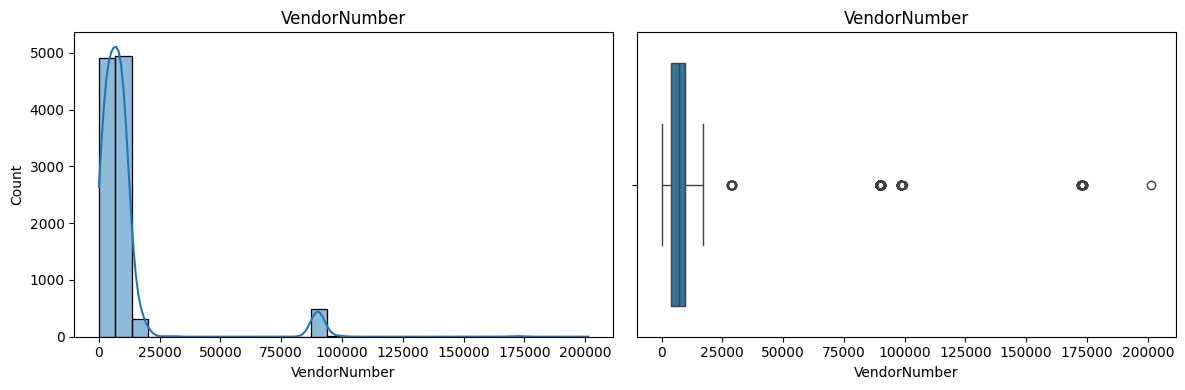

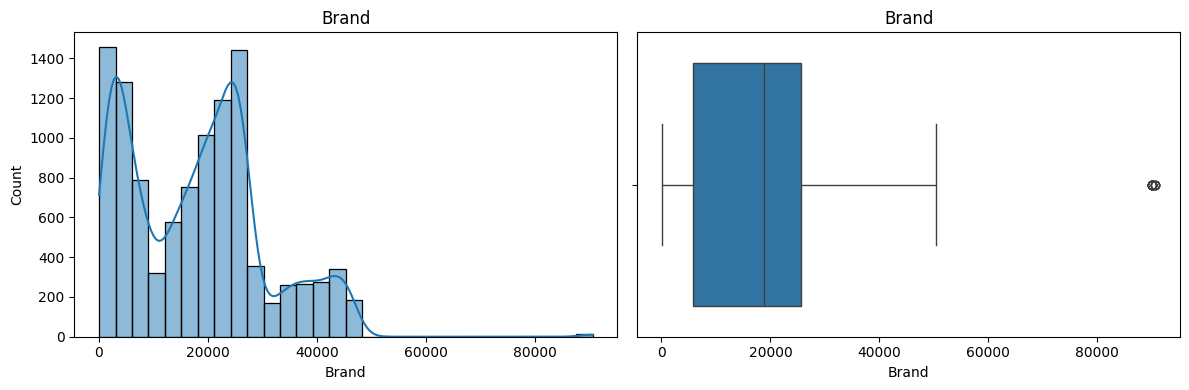

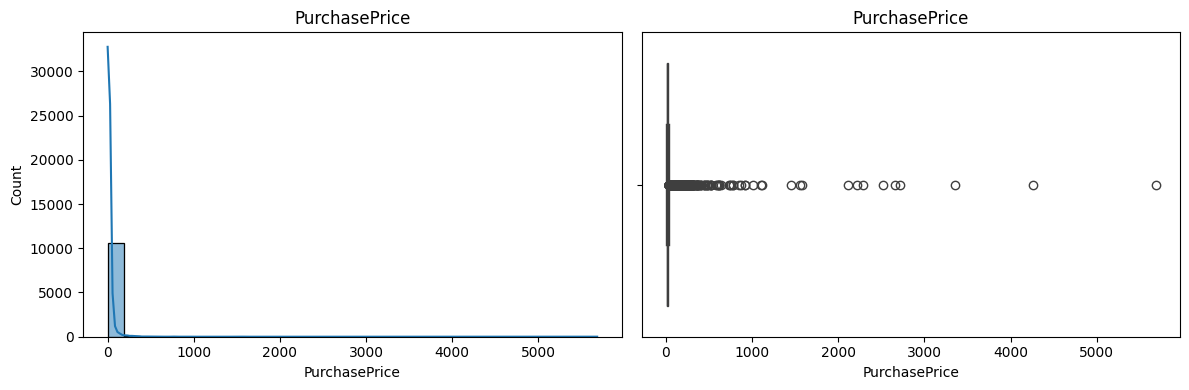

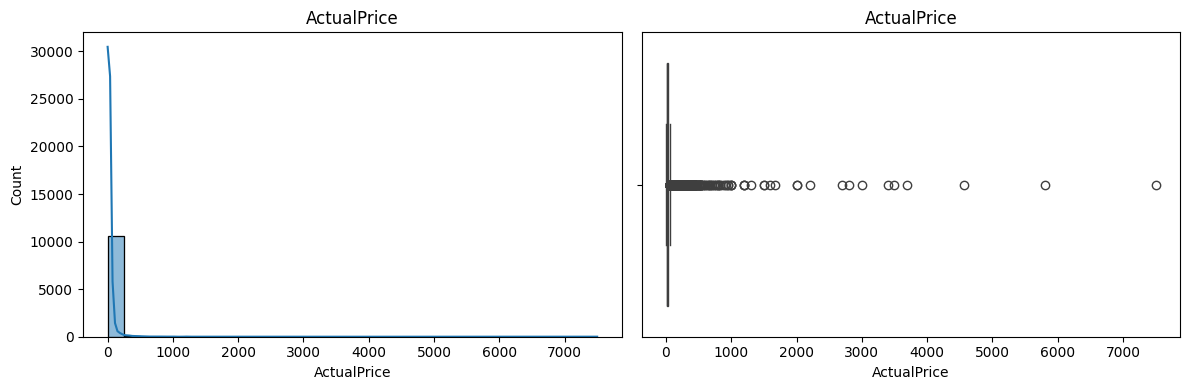

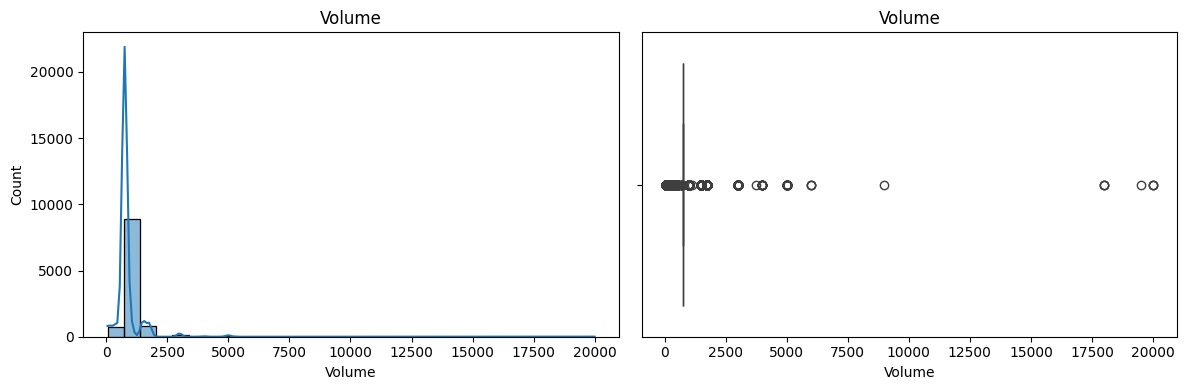

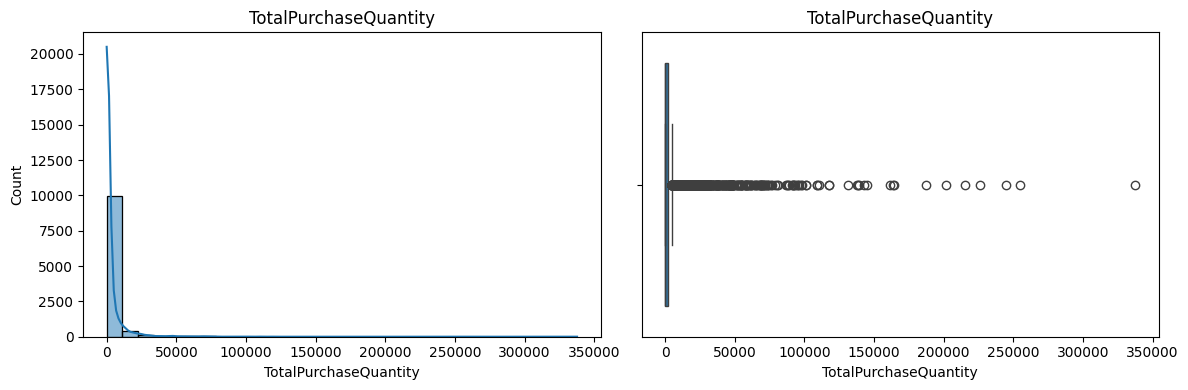

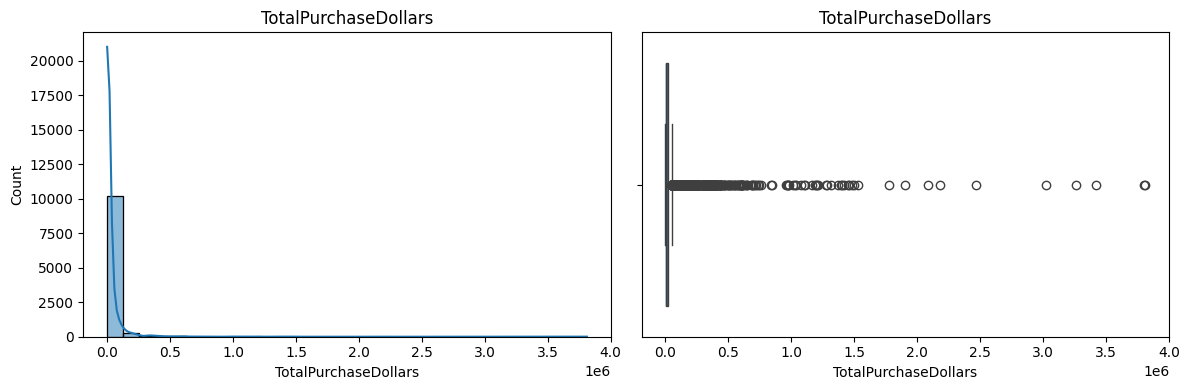

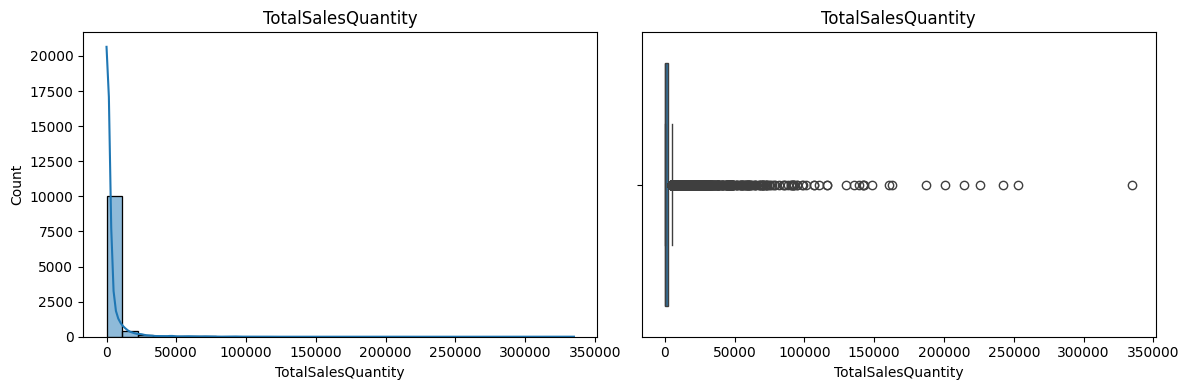

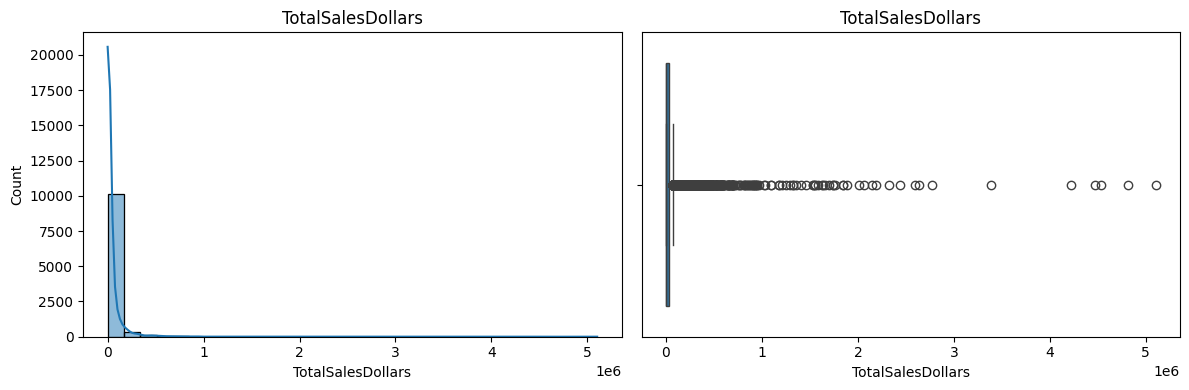

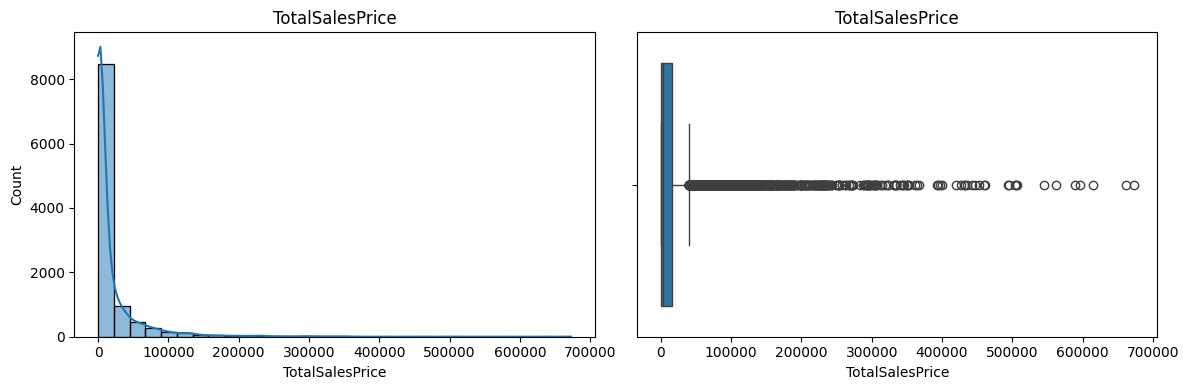

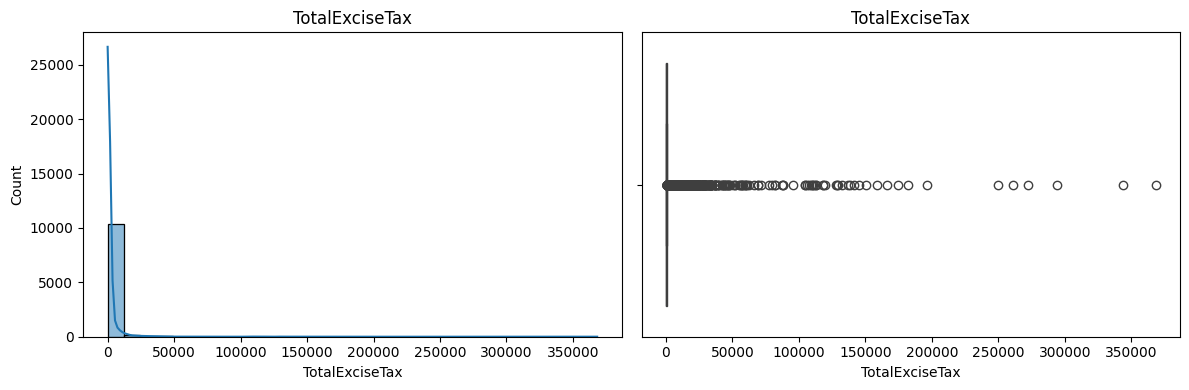

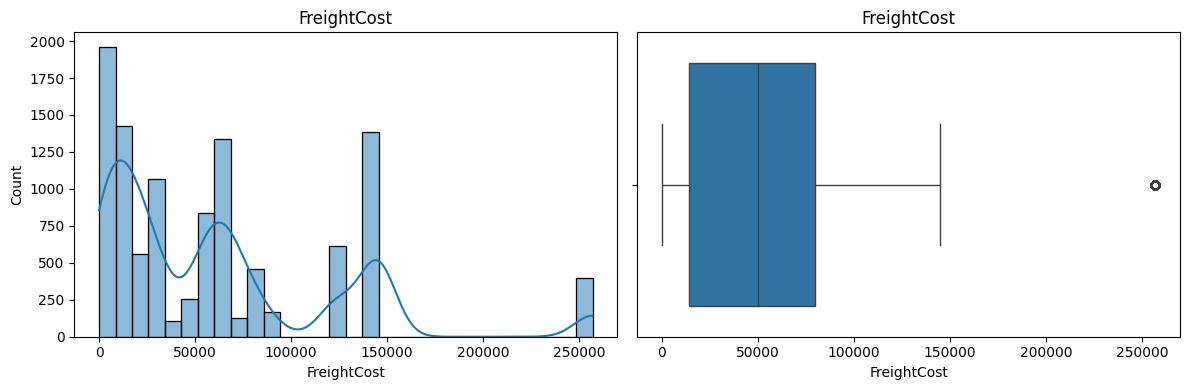

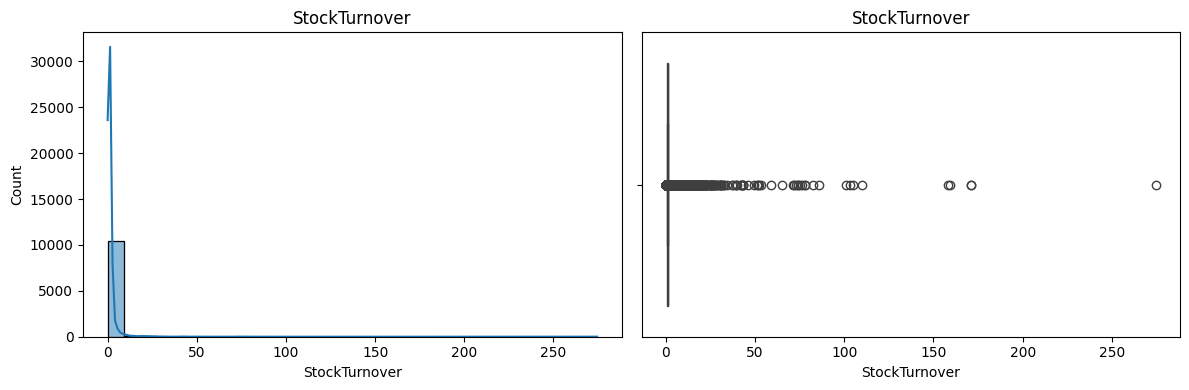

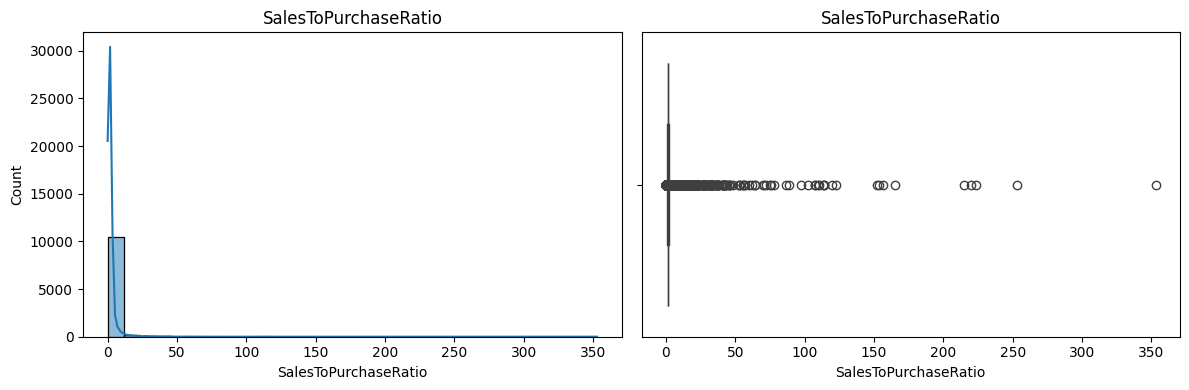

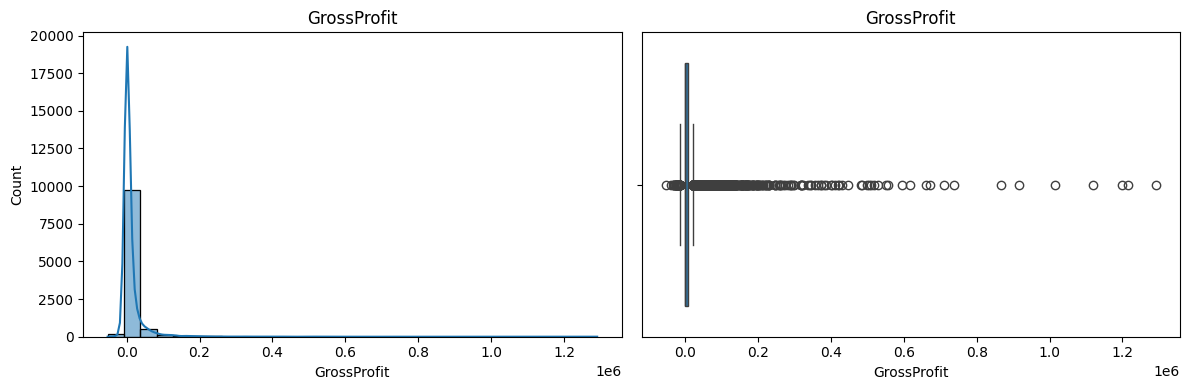

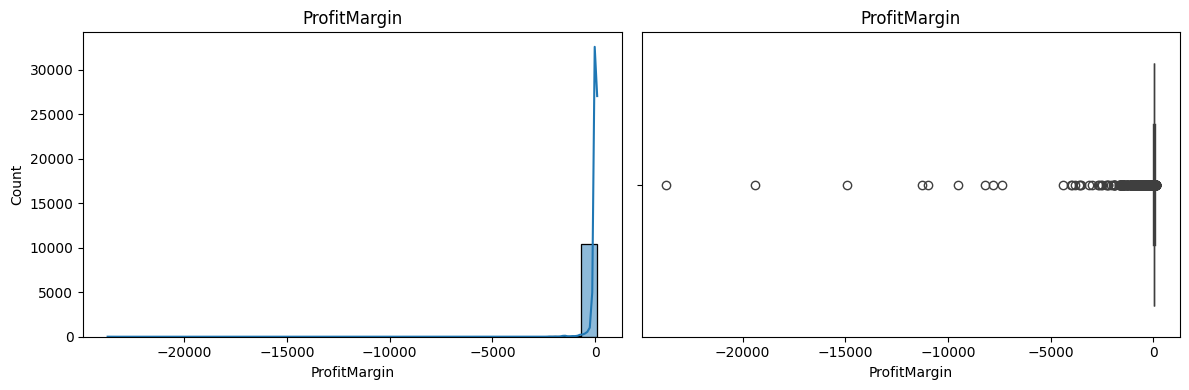

In [12]:
plot_hist_kde_box(df)

## Summary Statistics Insights:

**Negative & Zero Values:**

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.


In [13]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'StockTurnover',
       'SalesToPurchaseRatio', 'GrossProfit', 'ProfitMargin'],
      dtype='object')

In [ ]:
df = pd.read_sql_query(
    """SELECT * FROM vendor_sales_summary
                     WHERE 
                     GrossProfit>0 AND
                     ProfitMargin>0 AND 
                     TotalSalesQuantity>0
                     """,
    conn,
)

In [18]:
df.shape

(8564, 18)

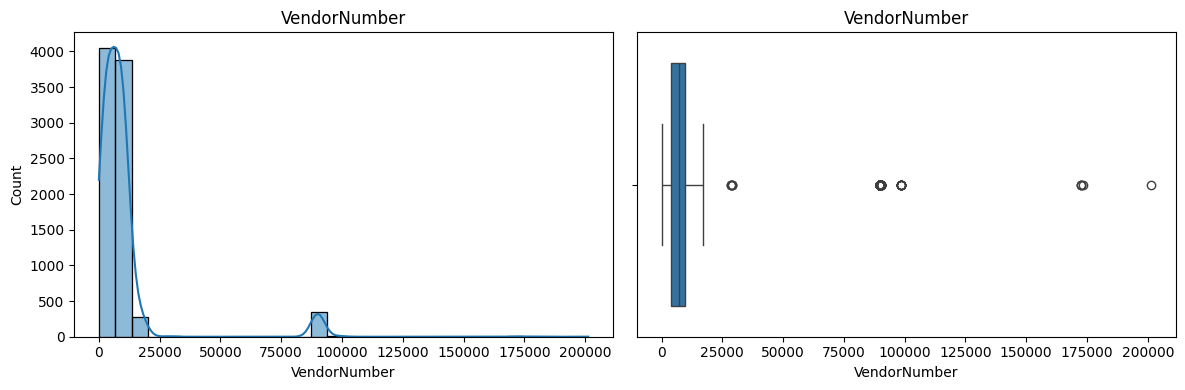

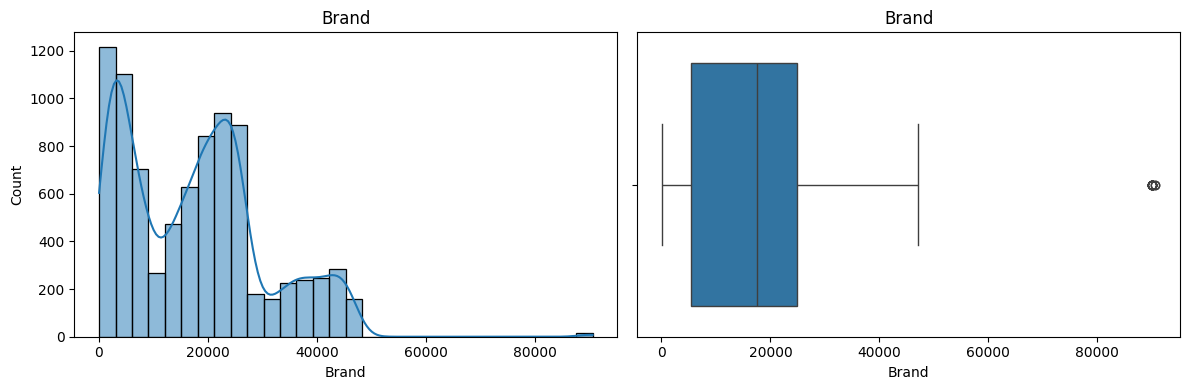

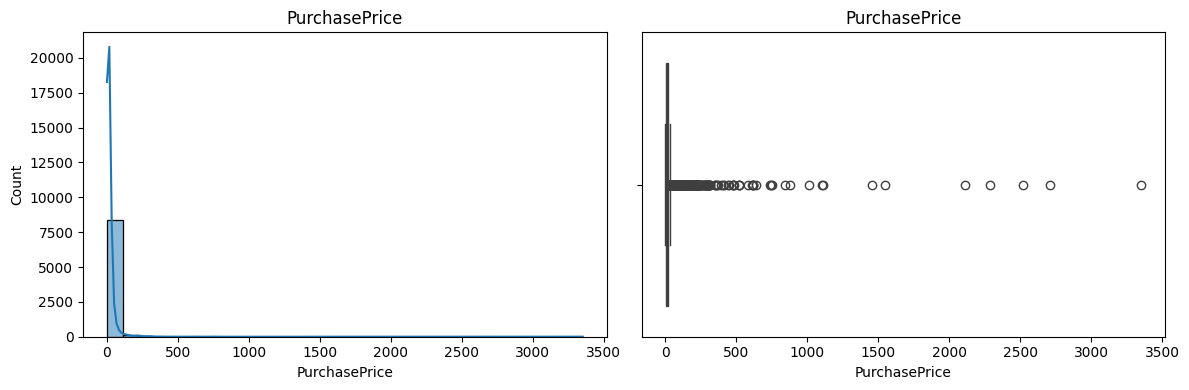

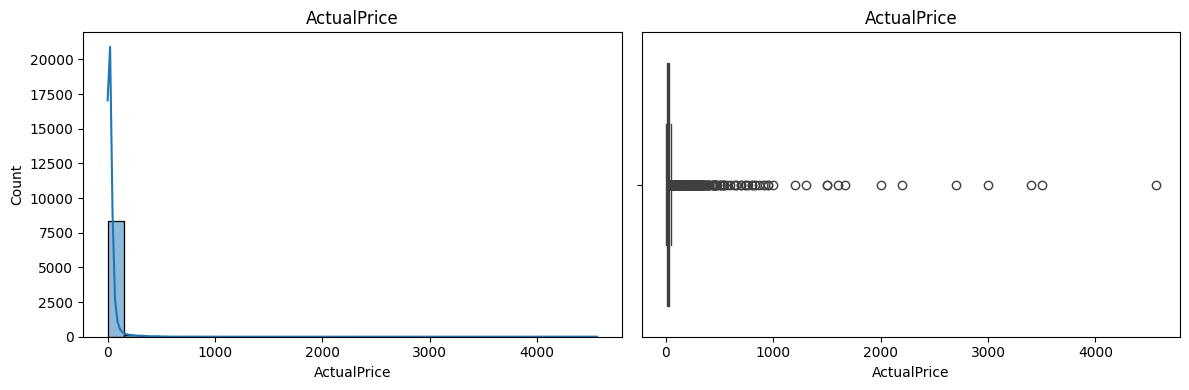

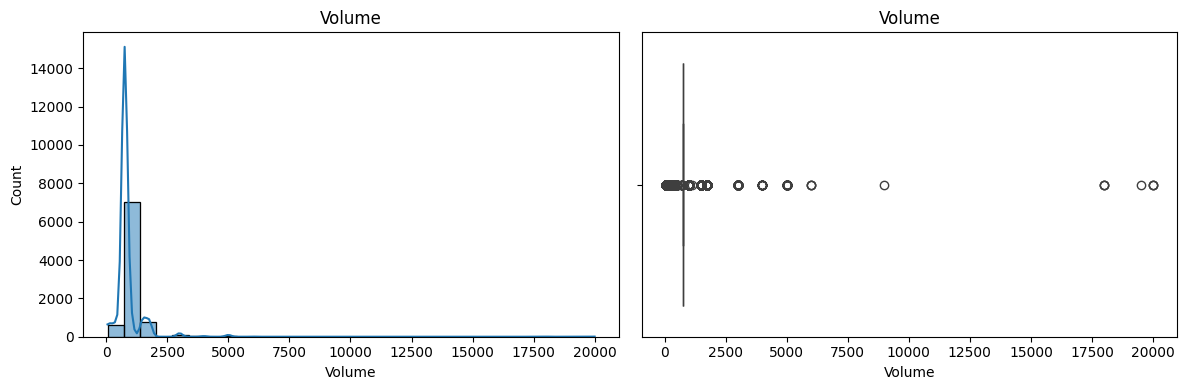

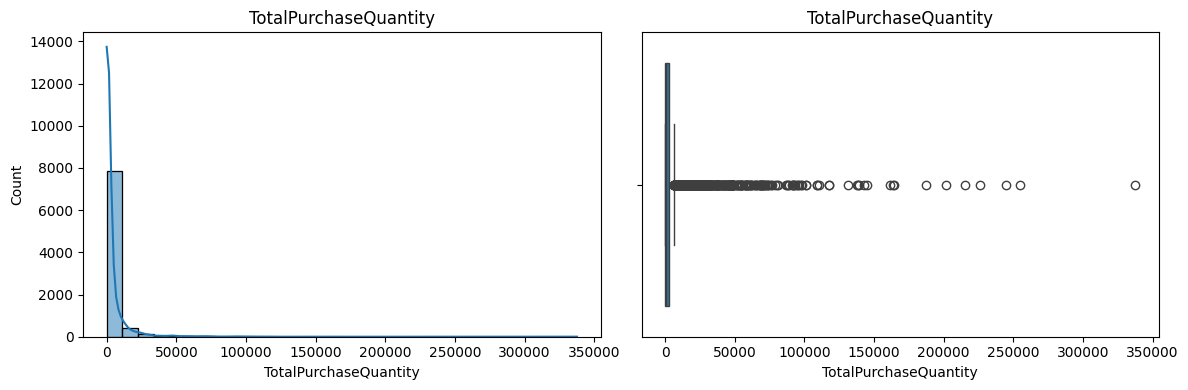

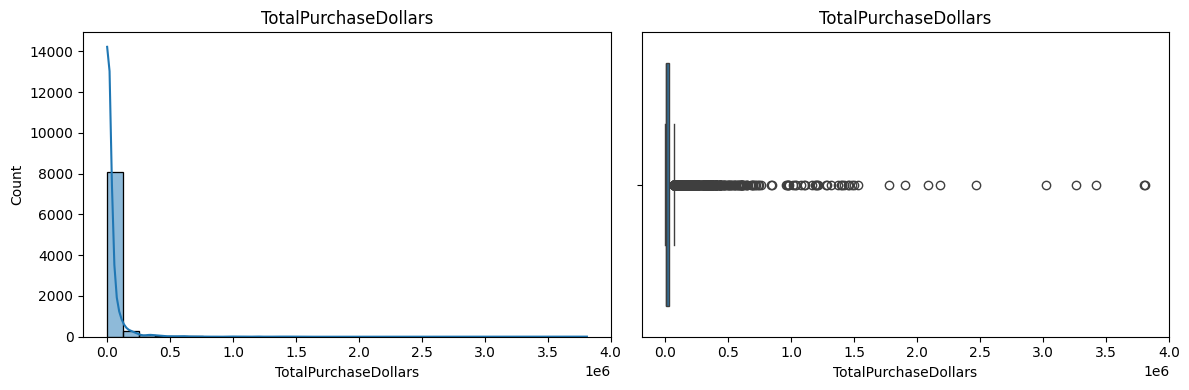

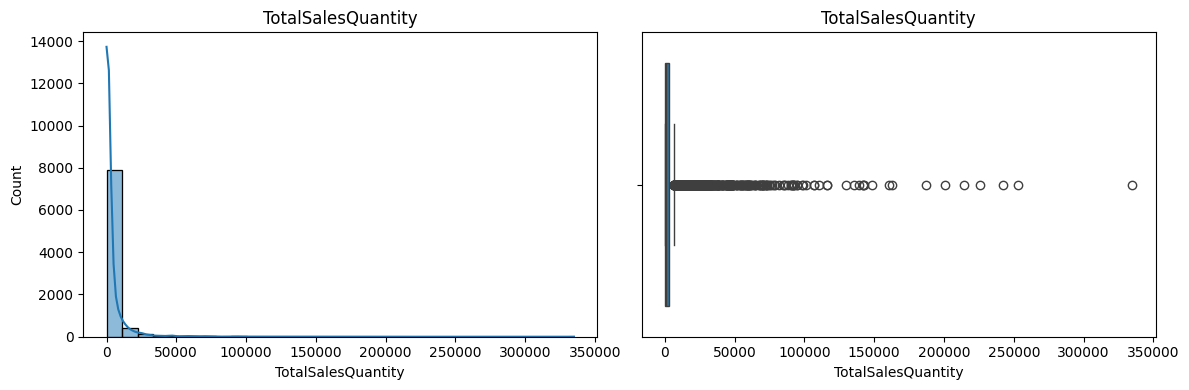

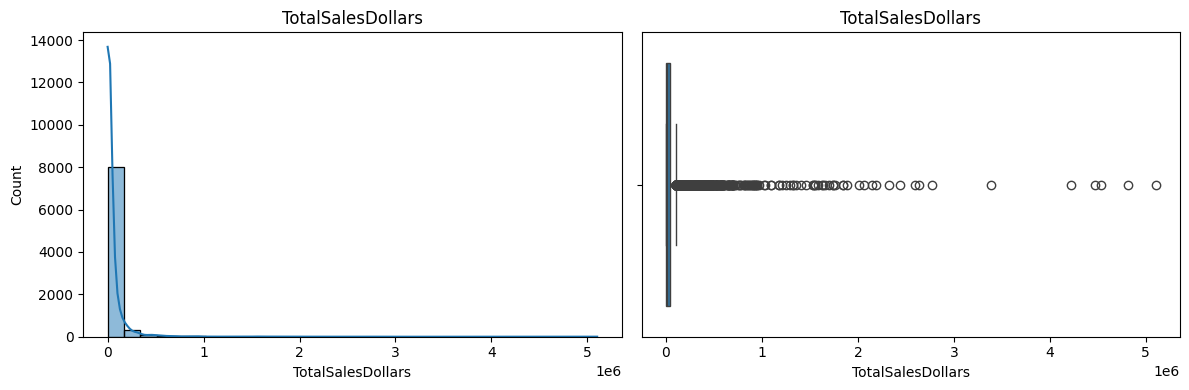

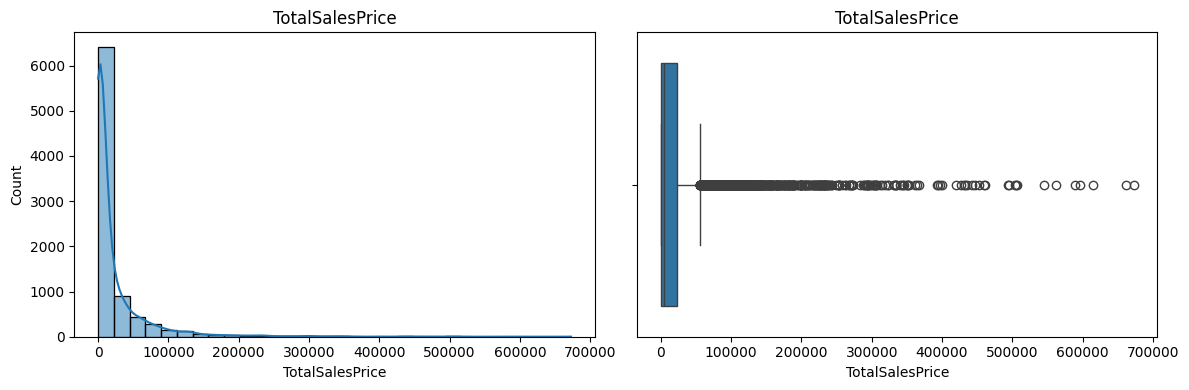

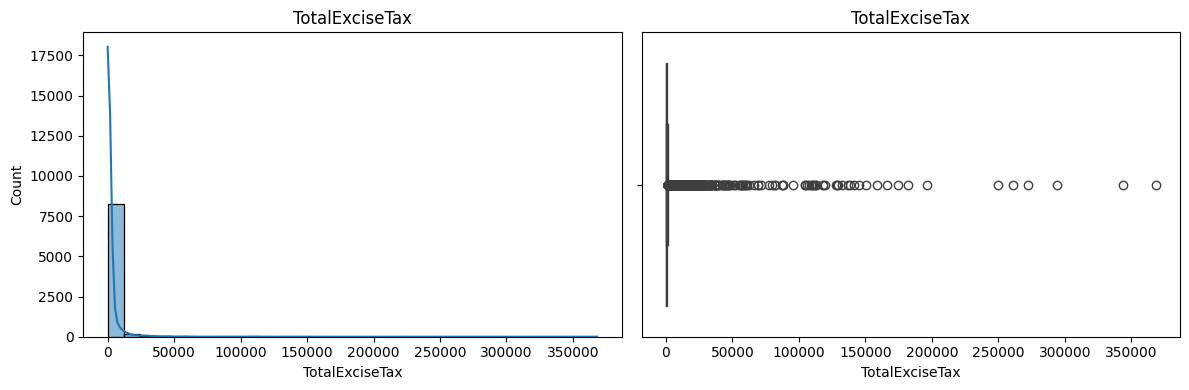

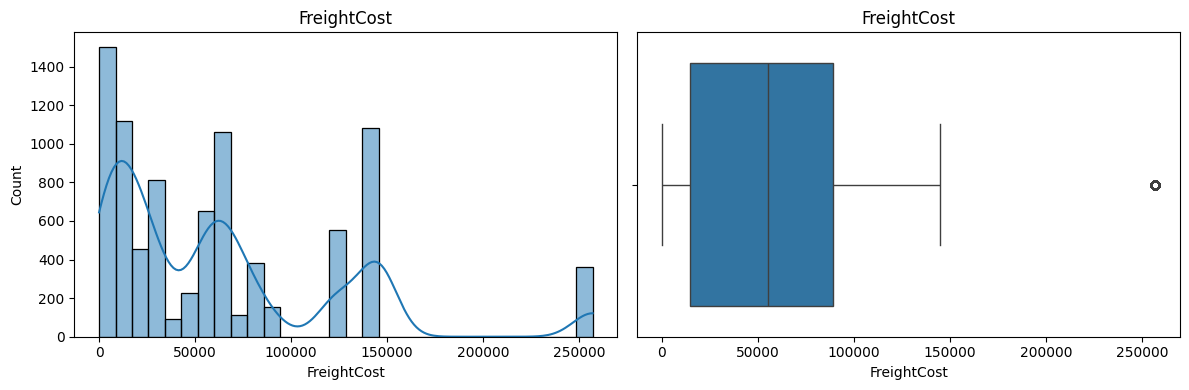

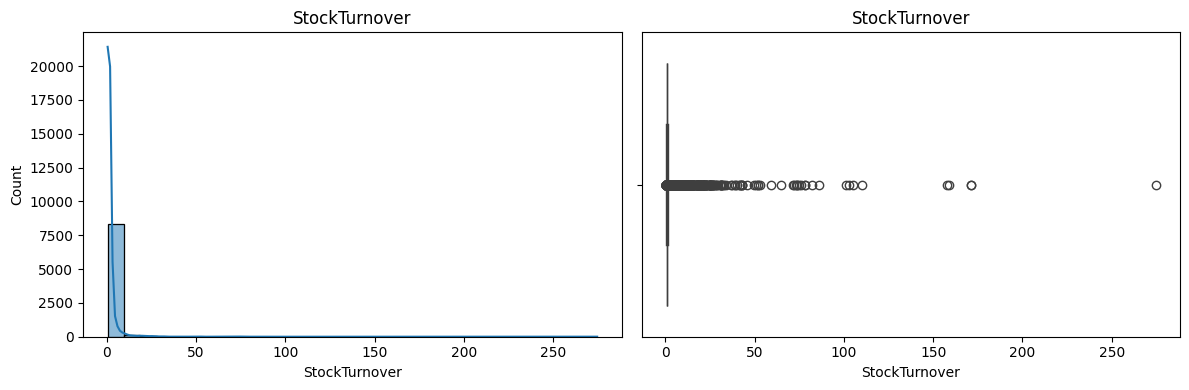

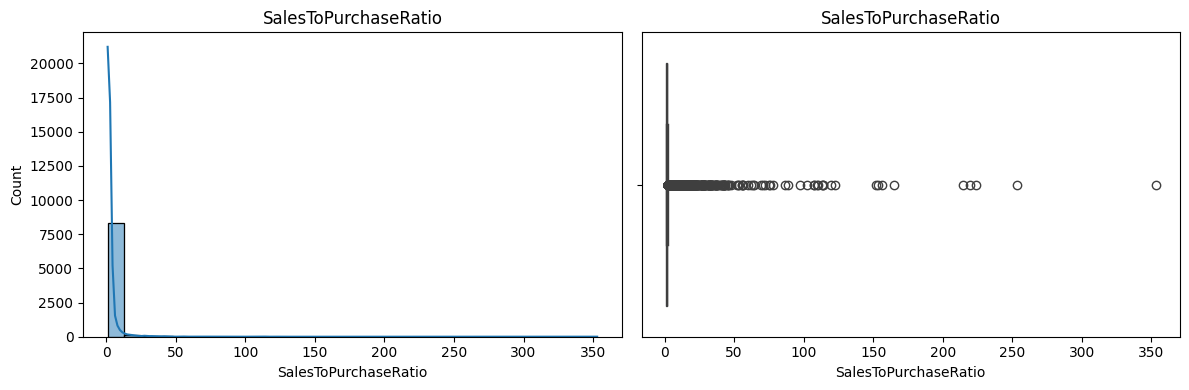

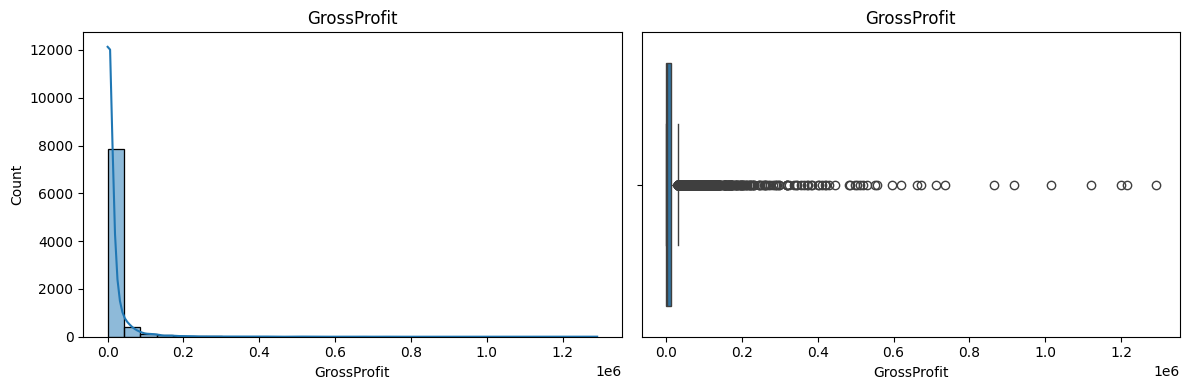

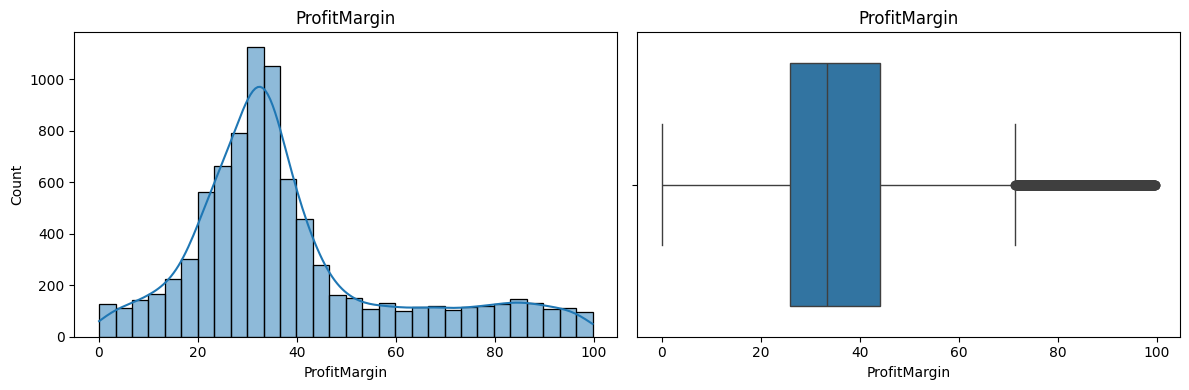

In [20]:
plot_hist_kde_box(df)

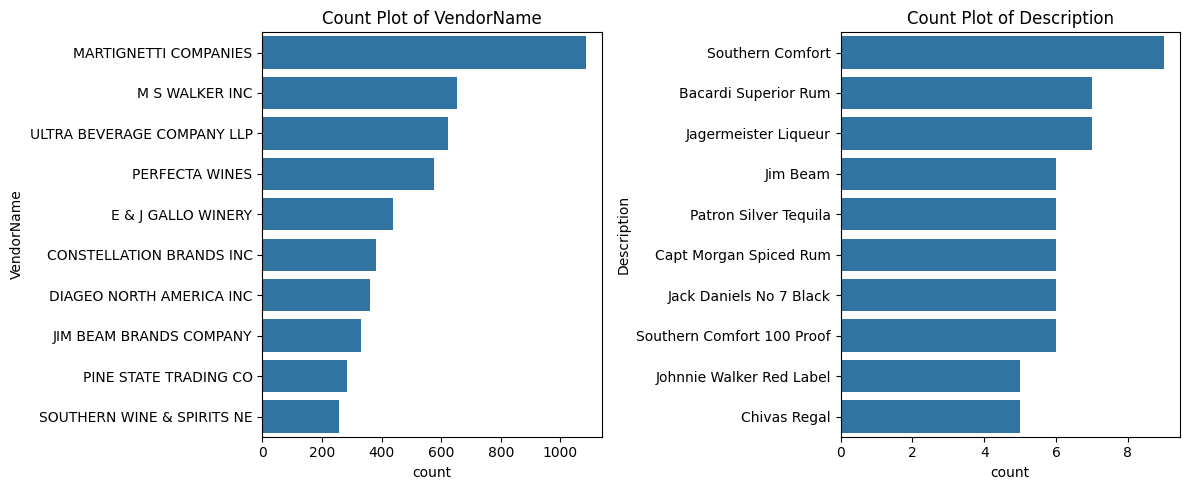

In [ ]:
# for top 10 brands and categories
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

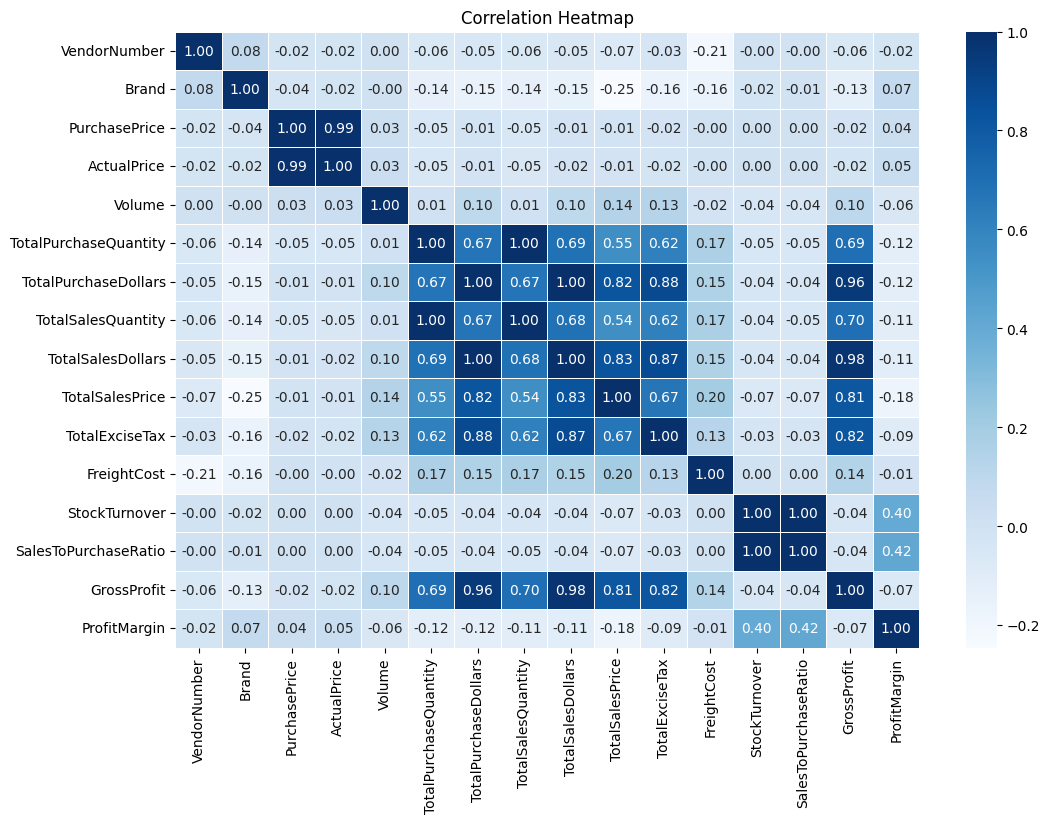

In [27]:
numerical_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Rank Vendors by Total Purchase Dollars

vendor_performance = (
    df.groupby("VendorName")
    .agg(
        {
            "TotalPurchaseDollars": "sum",
            "GrossProfit": "sum",
            "TotalSalesDollars": "sum",
        }
    )
    .reset_index()
)

vendor_performance["Purchase_Contribution%"] = (
    vendor_performance["TotalPurchaseDollars"]
    / vendor_performance["TotalPurchaseDollars"].sum()
) * 100

vendor_performance = round(
    vendor_performance.sort_values(by="TotalPurchaseDollars", ascending=False), 2
)

top_vendors = vendor_performance.head(10)
top_vendors["TotalSalesDollars"] = top_vendors["TotalSalesDollars"]
top_vendors["TotalPurchaseDollars"] = top_vendors["TotalPurchaseDollars"]
top_vendors["GrossProfit"] = top_vendors["GrossProfit"]
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
20,CONSTELLATION BRANDS INC,15273708.08,8945037.57,24218745.65,4.97
11,BROWN-FORMAN CORP,13238939.18,5008291.47,18247230.65,4.31
30,E & J GALLO WINERY,12068539.22,6331360.24,18399899.46,3.93
106,ULTRA BEVERAGE COMPANY LLP,11167081.61,5335462.70,16502544.31,3.63
53,M S WALKER INC,9764312.60,4942145.91,14706458.51,3.18


### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?


In [40]:
df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"]

# Group the Order Sizes (e.g., Small, Medium, Large Purchases)
df["OrderSize"] = pd.qcut(
    df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"]
)

# Analyze Cost Savings per Order Size
bulk_purchase_analysis = (
    df.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()
)
df.sample()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,StockTurnover,SalesToPurchaseRatio,GrossProfit,ProfitMargin,UnitPurchasePrice,OrderSize
5225,6213,MHW LTD,840,Bols Peach Flavored Brandy,8.79,10.99,1000.0,217,1907.43,212.0,2329.88,1868.3,222.6,9621.58,0.976959,1.221476,422.45,18.131835,8.79,Medium


In [41]:
bulk_purchase_analysis

,OrderSize,UnitPurchasePrice
0,Small,39.068186
1,Medium,15.486414
2,Large,10.777625


- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.